In [ ]:
!wget https://www.dropbox.com/s/0ezq2uv1c4wff9y/mochis.zip
!unzip -qq mochis.zip

--2022-11-14 02:01:16--  https://www.dropbox.com/s/0ezq2uv1c4wff9y/mochis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0ezq2uv1c4wff9y/mochis.zip [following]
--2022-11-14 02:01:17--  https://www.dropbox.com/s/raw/0ezq2uv1c4wff9y/mochis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc51f4ad8a7eb0807e714b8bcc2a.dl.dropboxusercontent.com/cd/0/inline/Bwsywf0xgg24rj3siBTQzpiDlW8-vtqO_-bDdilZDGaTr16SIlXcUJOGgscGrU-WDBhgcMXWOBDdZg1K-LZ5u5MCE2S4mGtdDsUxel3ZXz8WFzRh8UOT8zOFy7yrD3B2nwNh-PfzQyJ-Tp3t_wX8tiOuHJWIb5O8vEQmf4lnizCh7Q/file# [following]
--2022-11-14 02:01:17--  https://uc51f4ad8a7eb0807e714b8bcc2a.dl.dropboxusercontent.com/cd/0/inline/Bwsywf0xgg24rj3siBTQzpiDlW8-vtqO_-bDdilZDGaTr16SIlXcUJOGgscGrU-WDBhgcMXWOBDdZg1K-LZ5u

# Train YOLOv5s

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df

,File,x1,x2,y1,y2,obj,gen
0,G01_1001.png,176,433,232,477,0,F
1,G01_1001.png,624,827,260,490,0,M
2,G01_1001.png,258,388,148,240,1,F
3,G01_1001.png,588,739,131,254,1,M
4,G01_1001.png,123,509,153,913,2,F
...,...,...,...,...,...,...,...
5855,G10_4020.png,564,653,513,631,0,F
5856,G10_4020.png,400,474,403,474,1,F
5857,G10_4020.png,610,679,421,487,1,F
5858,G10_4020.png,334,518,388,809,2,F


In [ ]:
!mkdir labels

mkdir: cannot create directory ‘labels’: File exists


In [ ]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

d = dirfiles('mochis/','*.png')

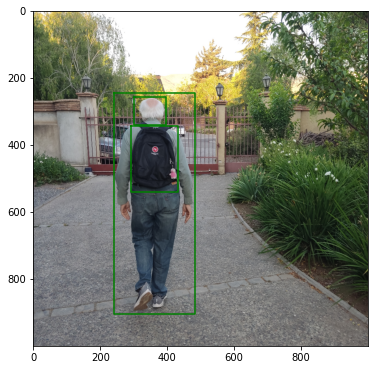

In [ ]:
i  = 100 # ID de la foto a desplegar
fname = d[i] # nombre de imagen i

X = cv2.imread('mochis/'+fname)
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

n = len(df)
# filas que contienen la imagen con nombre fname 
for k in range(n):
  if df.File[k] == fname:
    x1 = df.x1[k]
    x2 = df.x2[k]
    y1 = df.y1[k]
    y2 = df.y2[k]
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],c='g')

plt.show()

In [ ]:
from tqdm.auto import tqdm
m = len(d) # numero de imagenes
n = len(df) # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: Mochila, 1:)


for i in tqdm(range(m)):
  fname = d[i]
  X = cv2.imread('mochis/'+fname)
  N = X.shape[0]
  M = X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in range(n):
    tname = fname[:-3]+'txt'
    if df.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.obj[k]
      wn = (x2-x1)/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('labels/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()

  0%|          | 0/835 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test

In [ ]:
for xx in [str(i).zfill(2) for i in range(1,11)]:
  for integrante in range(1, 5):
    if integrante <= 3:
      for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'train'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)

    else:
      if int(xx) <= 4:
        for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'val'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)
      else:
        for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'test'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)

In [ ]:
# p_train = 0.70  # 70% del total de los datos son training
# p_val   = 0.10  # 10% de los datos de training son de validación

# #d = dirfiles('images/','*.jpg')
# m = len(d) # número de imagenes

# nt = round(p_train*m)
# nv = round(p_val*nt)

# ii = np.vstack([np.zeros((nt-nv,1)),np.ones((nv,1)),2*np.ones((m-nt,1))])

# target = ['train','val','test']

# for i in tqdm(range(m)):
#   fname            = d[i]
#   tname            = fname[:-3]+'txt'
#   ti               = target[int(ii[i])]
#   source_file      = 'mochis/'+fname
#   destination_file = 'data/images/'+ti 
#   os.system('cp ' + source_file + ' ' + destination_file) 
#   source_file      = 'labels/'+tname
#   destination_file = 'data/labels/'+ti 
#   os.system('cp ' + source_file + ' ' + destination_file) 

# print('Training: ', nt-nv)
# print('     Val: ', nv)
# print(' Testing: ',m-nt)

In [ ]:
PATH_TRAIN = 'data/images/train'
PATH_VAL   = 'data/images/val'
PATH_TEST  = 'data/images/test'
N_CLASSES  = 3 

class_names = ['Mochila', 'Cabeza', 'Persona']


f = open('data/data.yaml','w+')

f.write('train: ../'+PATH_TRAIN+'\n')
f.write('val:   ../'+PATH_VAL+'\n')
f.write('test:  ../'+PATH_TEST+'\n')
f.write('nc:  '+str(N_CLASSES)+'\n')
f.write('names:  '+str(class_names)+'\n')

f.close()

# Augmentation Flip horizontal

In [ ]:
#Train
train_flip = df.copy()
ind_train = df[df.File == sorted(os.listdir('/content/data/images/train'))[-1]].index[-1]
train_flip = train_flip.loc[:ind_train]

train_flip['File'] = train_flip['File'].apply(lambda x: x[:-4] + '_flip.png')
train_flip[['x1', 'x2']] = train_flip[['x1', 'x2']].apply(lambda x: -x%1000)

#Val
val_flip = df.copy()
ind_val = df[df.File == sorted(os.listdir('/content/data/images/train'))[-1]].index[-1]
val_flip = val_flip.loc[ind_train+1:ind_val]

val_flip['File'] = val_flip['File'].apply(lambda x: x[:-4] + '_flip.png')
val_flip[['x1', 'x2']] = val_flip[['x1', 'x2']].apply(lambda x: -x%1000)


# juntar

df = pd.concat([df, train_flip])
df = pd.concat([df, val_flip])

df = df.reset_index(drop=True)

In [ ]:
d_train_flip = [i[:-4] + '_flip.png' for i in dirfiles('/content/data/images/train','*.png')]
d_val_flip = [i[:-4] + '_flip.png' for i in dirfiles('/content/data/images/val','*.png')]

for name in d_train_flip:
  X = cv2.imread('/content/mochis/' + name.replace('_flip', ''))
  X = cv2.flip(X, 1)
  cv2.imwrite('/content/data/images/train/' + name, cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

for name in d_val_flip:
  X = cv2.imread('/content/mochis/' + name.replace('_flip', ''))
  X = cv2.flip(X, 1)
  cv2.imwrite('/content/data/images/val/' + name, cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

In [ ]:
from tqdm.auto import tqdm

#d_train_flip = dirfiles('/content/data/images/train','*.png')
m = len(d_train_flip) # numero de imagenes
n = train_flip.shape[0] # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: Mochila, 1:)


for i in tqdm(range(m)):
  fname = d_train_flip[i]
  #X = cv2.imread('mochis/'+fname)
  N = 1000#X.shape[0]
  M = 1000#X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in range(n):
    tname = fname[:-3]+'txt'
    if df.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.obj[k]
      wn = abs((x2-x1))/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('/content/data/labels/train/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()

In [ ]:
#d_val_flip = (val_flip.File).unique()
m = len(d_val_flip) # numero de imagenes
n = val_flip.shape[0] # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: Mochila, 1:)


for i in tqdm(range(m)):
  fname = d_val_flip[i]
  #X = cv2.imread('mochis/'+fname)
  N = 1000#X.shape[0]
  M = 1000#X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in val_flip.index:
    tname = fname[:-3]+'txt'
    if val_flip.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.obj[k]
      wn = abs((x2-x1))/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('/content/data/labels/val/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()

# Yolo

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)

In [ ]:
%cd yolov5

In [ ]:
YOLO_MODEL     = 'yolov5s' # puede ser yolov5m, yolov5l, yolov5x
EPOCHS         = 50
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'.pt'  # o pesos de otro modelo propio pre-entrenado
BATCH          = 4
IMG_SIZE       = 1000
YAMLFILE       = '../data/data.yaml'

In [ ]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --nosave --cache

TEST

In [ ]:
!mkdir runs
!mkdir runs/train
!mkdir runs/train/exp
!mkdir runs/train/exp/weights

In [ ]:
TEST_WEIGHTS = '/content/runs/train/exp/weights/last_flip.pt'#'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecución anterior
PATH_TEST    = '../data/images/test'

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img 1000 --conf 0.5 --source  {PATH_TEST} --save-txt --save-crop

In [ ]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --half

In [ ]:
I = cv2.imread('runs/val/exp/PR_curve.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

In [ ]:
I = cv2.imread('runs/val/exp2/PR_curve.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

PRUEBA IMAGEN

In [ ]:
NEW_PATH_TEST = '../newtest'
TEST_IMAGE = '/content/data/images/test/G10_3017.png'

In [ ]:
!mkdir {NEW_PATH_TEST}
!cp {TEST_IMAGE} {NEW_PATH_TEST}

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img 1000 --conf 0.4 --source  {NEW_PATH_TEST} --save-txt --save-crop

In [ ]:
X = cv2.imread('/content/yolov5/runs/detect/exp3/G10_3017.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(TEST_IMAGE)
plt.show()

# Correr esto para el YOLO

In [ ]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=7a2f78110392de9a48113d15f2bc54124259cd2c86a6e63708bc24ecc2aca20a
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
import pandas as pd
import numpy as np
import os
import time
import cv2
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
import copy
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from efficientnet_pytorch import EfficientNet
import gc

## Crear los conjuntos de imagenes

In [ ]:
!wget https://www.dropbox.com/s/0ezq2uv1c4wff9y/mochis.zip
!unzip -qq mochis.zip

--2022-11-14 14:07:07--  https://www.dropbox.com/s/0ezq2uv1c4wff9y/mochis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0ezq2uv1c4wff9y/mochis.zip [following]
--2022-11-14 14:07:07--  https://www.dropbox.com/s/raw/0ezq2uv1c4wff9y/mochis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf3456c69eae7ec6adc30e41405.dl.dropboxusercontent.com/cd/0/inline/BwtIgo4qFVPY6fn5cMiU6DiEleZ-FfbjUVaL7tZ7Sj1s7eWg84ODZrKCdgjmt5VFcWbFgCZAUjJim-LNKw1QNFv5E0uXViHfENNUKqWch8eddPl31l14VPSgRbrxqzjqB6RfDKcbi_s1W-10oIVi5ew-RaQwQkGRXqolUlZeYsrHFQ/file# [following]
--2022-11-14 14:07:08--  https://ucf3456c69eae7ec6adc30e41405.dl.dropboxusercontent.com/cd/0/inline/BwtIgo4qFVPY6fn5cMiU6DiEleZ-FfbjUVaL7tZ7Sj1s7eWg84ODZrKCdgjmt5VFcWbFgCZAUjJim-LNKw1

In [ ]:
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df

,File,x1,x2,y1,y2,obj,gen
0,G01_1001.png,176,433,232,477,0,F
1,G01_1001.png,624,827,260,490,0,M
2,G01_1001.png,258,388,148,240,1,F
3,G01_1001.png,588,739,131,254,1,M
4,G01_1001.png,123,509,153,913,2,F
...,...,...,...,...,...,...,...
5855,G10_4020.png,564,653,513,631,0,F
5856,G10_4020.png,400,474,403,474,1,F
5857,G10_4020.png,610,679,421,487,1,F
5858,G10_4020.png,334,518,388,809,2,F


In [ ]:
!mkdir labels

In [ ]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

d = dirfiles('mochis/','*.png')

In [ ]:
from tqdm.auto import tqdm
m = len(d) # numero de imagenes
n = len(df) # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: Mochila, 1:)


for i in tqdm(range(m)):
  fname = d[i]
  X = cv2.imread('mochis/'+fname)
  N = X.shape[0]
  M = X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in range(n):
    tname = fname[:-3]+'txt'
    if df.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.obj[k]
      wn = (x2-x1)/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('labels/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()

  0%|          | 0/835 [00:00<?, ?it/s]

In [ ]:
!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test

In [ ]:
for xx in [str(i).zfill(2) for i in range(1,11)]:
  for integrante in range(1, 5):
    if integrante <= 3:
      for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'train'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)

    else:
      if int(xx) <= 4:
        for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'val'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)
      else:
        for i in range(1, 21):
          fname            = 'G' + xx + '_' + str(integrante) + str(i).zfill(3) + '.png'
          tname            = fname[:-3]+'txt'
          ti               = 'test'
          source_file      = 'mochis/'+fname
          destination_file = 'data/images/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file) 
          source_file      = 'labels/'+tname
          destination_file = 'data/labels/'+ti 
          os.system('cp ' + source_file + ' ' + destination_file)

In [ ]:
PATH_TRAIN = 'data/images/train'
PATH_VAL   = 'data/images/val'
PATH_TEST  = 'data/images/test'
N_CLASSES  = 3 

class_names = ['Mochila', 'Cabeza', 'Persona']


f = open('data/data.yaml','w+')

f.write('train: ../'+PATH_TRAIN+'\n')
f.write('val:   ../'+PATH_VAL+'\n')
f.write('test:  ../'+PATH_TEST+'\n')
f.write('nc:  '+str(N_CLASSES)+'\n')
f.write('names:  '+str(class_names)+'\n')

f.close()

## YOLO

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 1.6 MB 30.5 MB/s 


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14919, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 14919 (delta 157), reused 192 (delta 110), pack-reused 14669
Receiving objects: 100% (14919/14919), 13.61 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (10296/10296), done.


In [ ]:
!pip install -qr yolov5/requirements.txt 

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!mkdir runs
!mkdir runs/train
!mkdir runs/train/exp
!mkdir runs/train/exp/weights

In [ ]:
#Descarga los pesos del YOLO y los pone en la carpeta runs/train/exp/weights

!wget https://www.dropbox.com/s/m0u15n9gv9hq4np/last_flip.pt?dl=0

os.rename('last_flip.pt?dl=0', 'last_flip.pt')

!cp last_flip.pt runs/train/exp/weights

--2022-11-14 04:44:05--  https://www.dropbox.com/s/m0u15n9gv9hq4np/last_flip.pt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/m0u15n9gv9hq4np/last_flip.pt [following]
--2022-11-14 04:44:05--  https://www.dropbox.com/s/raw/m0u15n9gv9hq4np/last_flip.pt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc6997ae55e39b9873e351319e8.dl.dropboxusercontent.com/cd/0/inline/Bws4ARNWK_Z2UAm2e1424ewExqiBUbsytwdv7UyWJpLxSBWB0BwCHGJAx_X8JWNIkrzHHrnOPZczshG_TUsmFlzwp28bNfH-eXSRmI9obwJE4k0kFuxNDbXBgeaVBJUiFKwt5Dijjtuufy9aXatOLa8eG_l9nEa9zc3oA51UOtPzHQ/file# [following]
--2022-11-14 04:44:06--  https://ucc6997ae55e39b9873e351319e8.dl.dropboxusercontent.com/cd/0/inline/Bws4ARNWK_Z2UAm2e1424ewExqiBUbsytwdv7UyWJpLxSBWB0BwCHGJAx_X8JWNIkrzHHrnOPZc

In [ ]:
TEST_WEIGHTS = 'runs/train/exp/weights/last_flip.pt'#'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecución anterior
PATH_TEST    = '../data/images/test'

In [ ]:
!python detect.py --weights {TEST_WEIGHTS} --img 1000 --conf 0.5 --source  {PATH_TEST} --save-txt --save-crop

detect: weights=['runs/train/exp/weights/last_flip.pt'], source=../data/images/test, data=data/coco128.yaml, imgsz=[1000, 1000], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-239-gf33718f Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [1000, 1000] must be multiple of max stride 32, updating to [1024, 1024]
image 1/100 /content/data/images/test/G05_4001.png: 1024x1024 5 Mochilas, 6 Cabezas, 3 Personas, 2107.0ms
image 2/100 /content/data/images/test/G05_4002.png: 1024x1024 3 Cabezas, 2 Personas, 1989.6ms
image 3/100 /content/data/images/test/G05_4003.png: 1024x1024 1 Mochi

# Modelos Pre-Entrenados

## Functions

In [ ]:
def accuracy(predictions, labels):
    #round predictions to the closest integer
    probs = torch.softmax(predictions, dim=1)
    winners = probs.argmax(dim=1)
    corrects = (winners == labels).float()
    acc = corrects.sum() / len(corrects)
    return acc
    
def train_epoch(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc  = 0
    model.train()
    for batch in iterator:

        optimizer.zero_grad()

        img, label = batch
        img = img.to(device)
        label = label.to(device)

        predictions = model(img)#.squeeze()

        loss = criterion(predictions, label)
        acc  = accuracy(predictions, label)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc  += acc.item()
    
    return epoch_loss/len(iterator), epoch_acc/len(iterator)

def eval_epoch(model, iterator, criterion, device):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    #deactivating dropout layers
    model.eval()

    #deactivates autograd
    with torch.no_grad():
        for batch in iterator:
        
            img, label = batch
            img = img.to(device)
            label = label.to(device)

            #convert to 1d tensor
            predictions = model(img)
            
            #compute loss and accuracy
            loss = criterion(predictions, label)
            acc = accuracy(predictions, label)
            
            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def testing(model, iterator, batch_size, device):

    preds = []
    lbls  = []
    predictions = torch.Tensor(len(iterator)*batch_size).to(device)
    labels      = torch.Tensor(len(iterator)*batch_size).to(device)


    #deactivating dropout layers
    model.eval()

    #deactivates autograd
    with torch.no_grad():
        for batch in iterator:
        
            img, label = batch
            img = img.to(device)
            label = label.to(device)
            
            #convert to 1d tensor
            scores = model(img)
            probs = torch.softmax(scores, dim=1)
            winners = probs.argmax(dim=1)
            preds.append(winners)
            lbls.append(label)
    
    torch.cat(preds, out=predictions)
    torch.cat(lbls, out=labels)

    return predictions.cpu().numpy(), labels.cpu().numpy()

def metrics(predictions, labels):
    cm = confusion_matrix(labels, predictions)
    Accuracy = np.sum(np.diag(cm))/np.sum(cm)
    Pr = np.mean(np.diag(cm) / np.sum(cm, axis = 0))
    Re = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
    F1 = 2*(Pr*Re)/(Pr + Re)
    return Accuracy, Pr, Re, F1, cm

def num_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
def train(model, train_dataloader, val_dataloader, optimizer, criterion, device, num_epochs, 
          saved_models_folder, saved_scores_folder, save_path, printfreq=1):

    train_loss_hist = []
    train_acc_hist  = []
    val_loss_hist   = []
    val_acc_hist    = []

    best_val_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())

    t0 = time.time()
    print(' Epoch    Train Loss    Val Loss    Train Acc    Val Acc    Best    Time [min]')
    print('-'*79)

    for epoch in range(num_epochs):
        t1 = time.time()
        st = '        '

        # Training metrics
        train_loss, train_acc = train_epoch(model, train_dataloader, optimizer, criterion, device)
        train_loss_hist.append(train_loss)
        train_acc_hist.append(train_acc)

        # Validation metrics
        val_loss, val_acc     = eval_epoch(model, val_dataloader, criterion, device)
        val_loss_hist.append(val_loss)
        val_acc_hist.append(val_acc)
        
        # Update best model
        if val_loss < best_val_loss:
            st = '     ***'
            best_val_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(best_model_wts, os.path.join(saved_models_folder, 'best_' + save_path))

        if (epoch + 1) % printfreq == 0:
            t2 = (time.time() - t1)/60
            s = f'{epoch+1:6}{train_loss:12.4f}{val_loss:13.4f}{train_acc:13.4f}{val_acc:12.4f}{st}{t2:10.1f}' 
            print(s)

        # Save current model and training information
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': val_loss,
        }, os.path.join(saved_models_folder, save_path))

        # Save the loss and accuracy values
        np.save(os.path.join(saved_scores_folder, f'{save_path}_train_loss'), train_loss_hist)
        np.save(os.path.join(saved_scores_folder, f'{save_path}_train_acc'), train_acc_hist)
        np.save(os.path.join(saved_scores_folder, f'{save_path}_val_loss'), val_loss_hist)
        np.save(os.path.join(saved_scores_folder, f'{save_path}_val_acc'), val_acc_hist)
        
    tfinal = (time.time() - t0)/60
    print('-'*79)
    print(f'Total time [min] for {num_epochs} Epochs: {tfinal:.1f}')
    return

In [ ]:
def display_train_metrics(saved_scores_folder, save_path):
    
    # Loss
    train_loss_hist = np.load(os.path.join(saved_scores_folder, f'{save_path}_train_loss.npy'))
    val_loss_hist = np.load(os.path.join(saved_scores_folder, f'{save_path}_val_loss.npy'))

    # Acc
    train_acc_hist = np.load(os.path.join(saved_scores_folder, f'{save_path}_train_acc.npy'))
    val_acc_hist = np.load(os.path.join(saved_scores_folder, f'{save_path}_val_acc.npy'))

    num_epochs = len(train_loss_hist)
    epochs = range(1, num_epochs + 1)
    

    plt.plot(epochs, train_loss_hist, marker='o', label='Training')
    plt.plot(epochs, val_loss_hist, marker='o', label='Validation')
    plt.title('Loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, train_acc_hist, marker='o', label='Training')
    plt.plot(epochs, val_acc_hist, marker='o', label='Validation')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
def reset_model(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

In [ ]:
def get_dataloaders(data_dir, input_size, batch_size=32):
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(input_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        }
    print("Initializing Datasets and Dataloaders...")

    # Create training and validation datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val', 'test']}
    # Create training and validation dataloaders
    dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'val', 'test']}
    return dataloaders_dict

## Model

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

def initialize_model(model_name, num_classes, feature_extract=False, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model = None
    input_size = 0

    if 'resnet' in model_name:
        if model_name == 'resnet18':
            """ Resnet18"""
            model = models.resnet18(pretrained=use_pretrained)

        if model_name == 'resnet34':
            """ Resnet34"""
            model = models.resnet34(pretrained=use_pretrained)
        if model_name == 'resnet50':
            """ Resnet50"""
            model = models.resnet50(pretrained=use_pretrained)
        if model_name == 'resnet101':
            """ Resnet101"""
            model = models.resnet101(pretrained=use_pretrained)
        if model_name == 'resnet152':
            """ Resnet152"""
            model = models.resnet152(pretrained=use_pretrained)

        set_parameter_requires_grad(model, feature_extract)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif 'effnet' in model_name:
        model_n = model_name[-1]
        full_model_name = f'efficientnet-b{model_n}'
        model = EfficientNet.from_pretrained(full_model_name, num_classes=num_classes)
        input_size = EfficientNet.get_image_size(full_model_name)


    elif model_name == "alexnet":
        """ Alexnet
        """
        model = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model, feature_extract)
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    else:
        print("Invalid model name, exiting...")
        exit()

    return model, input_size

## Predict Mochilas

In [ ]:
util = 'pretrain_utils'
utilpy = util+'2.py'
if os.path.isfile(utilpy):
  del sys.modules[util]
  os.remove(utilpy)
  print(util+' removed.')
print(util+' ready to load.')

!wget https://www.dropbox.com/s/5nnub5axbj20e2m/pretrain_utils2.py
!cp pretrain_utils2.py pretrain_utils.py
from pretrain_utils import loaderdef,modeldef,showimages,evaluate,megatrain,printaccm,get_predictions,plot_confusion_matrix
print('pretrain_utils module has been loaded')

In [ ]:
%cd '/content'
!wget https://www.dropbox.com/s/f1ol7bdc4tmxj5j/best_model_efficientnet_b3.pt

In [ ]:
#import torch.nn as nn

#besti = np.argmax(acc[:,1]) # best model: best accuracy in validation set

model_list = ['efficientnet_b3']
num_classes = 2

modelname   = 'best_model_efficientnet_b3'
model,modelfamily,trans_norm = modeldef('efficientnet_b3',num_classes)

device      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion   = nn.CrossEntropyLoss()
model       = model.to(device)
criterion   = criterion.to(device)

model.load_state_dict(torch.load(modelname+'.pt'))
#test_loss, test_acc = evaluate(model, test_loader, criterion, device)
#print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
from pretrain_utils import datadef, DataLoader
import torchvision

In [ ]:


fpath = '/content/yolov5/runs/detect/exp/crops'

In [ ]:
!mkdir newtest_mochilas
!mkdir newtest_mochilas/data
#!mkdir newtest/data/mochilas

!cp {fpath}/Mochila/* newtest_mochilas/data # new data

In [ ]:
def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names


def loader_test(fpath,trans_norm,batch_size,show=False):
    (train_tf,val_tf,test_tf) = datadef(trans_norm)

    test_ds  = torchvision.datasets.ImageFolder(fpath+'/' , transform = test_tf)

    test_loader  = DataLoader(test_ds , batch_size=batch_size, shuffle=True, num_workers=4)

    if show:
        print('Number of Samples:')
        print(f'    Test: {len(test_ds)}')
        showimages(test_loader)

    return test_loader

test_loader_new = loader_test('/content/newtest_mochilas/',False,16,show=False)

ld = test_loader_new 

images, labels, probs = get_predictions(model,ld,device)
pred_labels_mochilas = torch.argmax(probs,1)

print(pred_labels_mochilas)




## Predict Cabezas

In [ ]:
%cd '/content'
!wget https://www.dropbox.com/s/2hfm4c6tg6j75wv/models-cabeza.zip?dl=0

os.rename('models-cabeza.zip?dl=0', 'models-cabeza.zip')

!unzip -qq models-cabeza

In [ ]:
#import torch.nn as nn

#besti = np.argmax(acc[:,1]) # best model: best accuracy in validation set

model_list = ['efficientnet_b2']
num_classes = 2

modelname   = 'best_model_efficientnet_b2'
model,modelfamily,trans_norm = modeldef('efficientnet_b2',num_classes)

device      = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion   = nn.CrossEntropyLoss()
model       = model.to(device)
criterion   = criterion.to(device)

model.load_state_dict(torch.load('/content/models/' + modelname+'.pt'))
#test_loss, test_acc = evaluate(model, test_loader, criterion, device)
#print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
fpath = '/content/yolov5/runs/detect/exp/crops'

In [ ]:
!mkdir newtest_cabeza
!mkdir newtest_cabeza/data
#!mkdir newtest_cabeza/data/cabezas

# !mkdir newtest
# !mkdir newtest/data
# !mkdir newtest/data/cabezas

!cp {fpath}/Cabeza/* newtest_cabeza/data # new data

In [ ]:
def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names


def loader_test(fpath,trans_norm,batch_size,show=False):
    (train_tf,val_tf,test_tf) = datadef(trans_norm)

    test_ds  = torchvision.datasets.ImageFolder(fpath+'/' , transform = test_tf)

    test_loader  = DataLoader(test_ds , batch_size=batch_size, shuffle=True, num_workers=4)

    if show:
        print('Number of Samples:')
        print(f'    Test: {len(test_ds)}')
        showimages(test_loader)

    return test_loader

test_loader_new = loader_test('/content/newtest_cabeza/',False,8,show=False)

ld = test_loader_new 

images, labels, probs = get_predictions(model,ld,device)
pred_labels_cabezas = torch.argmax(probs,1)

print(pred_labels_cabezas)


## Predict Persona

In [ ]:
%cd '/content'
!wget https://www.dropbox.com/s/vk6zjzqtgaog1ud/best_model_efficientnet_b2.pt

In [ ]:
model_name        = 'effnetb2'
model, input_size = initialize_model(model_name, 2)
device            = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model             = model.to(device)

data_dir = '/content/yolov5/runs/detect/exp/crops'

saved_models_folder = '/content'
save_path = 'best_model_efficientnet_b2.pt'
model.load_state_dict(torch.load(os.path.join(saved_models_folder, save_path)))

In [ ]:
fpath = '/content/yolov5/runs/detect/exp/crops'

In [ ]:
!mkdir newtest_personas
!mkdir newtest_personas/data

!cp {fpath}/Persona/* newtest_personas/data # new data

In [ ]:
def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names


def loader_test(fpath,trans_norm,batch_size,show=False):
    (train_tf,val_tf,test_tf) = datadef(trans_norm)

    test_ds  = torchvision.datasets.ImageFolder(fpath+'/' , transform = test_tf)

    test_loader  = DataLoader(test_ds , batch_size=batch_size, shuffle=True, num_workers=4)

    if show:
        print('Number of Samples:')
        print(f'    Test: {len(test_ds)}')
        showimages(test_loader)

    return test_loader

test_loader_new = loader_test('/content/newtest_personas',False,8,show=False)

ld = test_loader_new 

images, labels, probs = get_predictions(model,ld,device)
pred_labels_personas = torch.argmax(probs,1)

print(pred_labels_personas)

# Paso 9

In [ ]:
Directory = '/content/yolov5/runs/detect/exp/'

Images = os.listdir(Directory)
Images.sort()
Images = Images[:-2]

bb_path = Directory + 'labels/'

In [ ]:
file_name = Images[-15]
file_path = '/content/mochis/' + file_name
file_text_path = bb_path + file_name[:8] + '.txt'
bb = pd.read_csv(file_text_path, sep=" ", header=None)
bb.columns = ['obj', 'x', 'y', 'w', 'h']

bb['x'] = bb['x'] *1000
bb['y'] = bb['y'] *1000
bb['h'] = bb['h'] *1000
bb['w'] = bb['w'] *1000

personas_con_mochila = list()
for i in bb.index:
  if bb['obj'][i] == 2:
    for j in bb.index:
      if (bb['x'][j] < bb['x'][i] + + bb['w'][i]/2) and (bb['x'][i] - bb['w'][i]/2) < bb['x'][j] and j != i:
        personas_con_mochila.append(i)

dict_pcm = {i:personas_con_mochila.count(i) for i in personas_con_mochila}
for key, value in dict_pcm.items():
  if value <= 1:
    bb = bb.drop([key])

In [ ]:
Directory_cabezas = '/content/newtest_cabeza/data/'

Images_cabezas = os.listdir(Directory_cabezas)
Images_cabezas.sort()

pred_cabezas = list()

t = 0
for image in Images_cabezas:
  if file_name[:8] == image[:8]:
    pred_cabezas.append(pred_labels_cabezas[t])
  t += 1

In [ ]:
Directory_mochilas = '/content/newtest_mochilas/data/'

Images_mochilas = os.listdir(Directory_mochilas)
Images_mochilas.sort()

pred_mochilas = list()

t = 0
for image in Images_mochilas:
  if file_name[:8] == image[:8]:
    pred_mochilas.append(pred_labels_mochilas[t])
  t += 1

In [ ]:
Directory_personas = '/content/newtest_personas/data/'

Images_personas = os.listdir(Directory_personas)
Images_personas.sort()

pred_personas = list()

t = 0
for image in Images_personas:
  if file_name[:8] == image[:8]:
    pred_personas.append(pred_labels_personas[t])
  t += 1

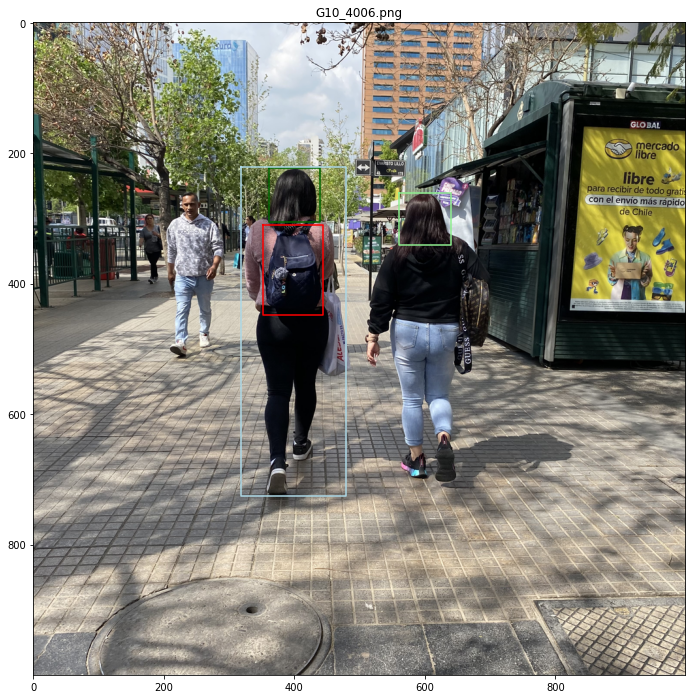

In [ ]:
dict_personas = {k:{} for k,v in dict_pcm.items()}

X = cv2.imread(file_path) 
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(file_name)

t = 0
j = 0
z = 0
    
for i in bb.index:
  x = [bb['x'][i] - bb['w'][i]/2,bb['x'][i] + bb['w'][i]/2,bb['x'][i] + bb['w'][i]/2,bb['x'][i] - bb['w'][i]/2,bb['x'][i] - bb['w'][i]/2]
  y = [bb['y'][i] - bb['h'][i]/2,bb['y'][i] - bb['h'][i]/2,bb['y'][i] + bb['h'][i]/2,bb['y'][i] + bb['h'][i]/2,bb['y'][i] - bb['h'][i]/2]
  if bb['obj'][i] == 0:
    if pred_mochilas[j] == 0:
      for r in bb.index:
        if bb['obj'][r] == 2:
          if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
            dict_personas[r]['mochila'] = 'F'
      plt.plot(x,y,c='red')
    if pred_mochilas[j] == 1:
      for r in bb.index:
        if bb['obj'][r] == 2:
          if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
            dict_personas[r]['mochila'] = 'M'
      plt.plot(x,y,c='darkred')
    j += 1
  if bb['obj'][i] == 1:
    if pred_cabezas[t] == 1:
      for r in bb.index:
        if bb['obj'][r] == 2:
          if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
            dict_personas[r]['cabeza'] = 'F'
      plt.plot(x,y,c='darkgreen')
    if pred_cabezas[t] == 0:
      for r in bb.index:
        if bb['obj'][r] == 2:
          if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
            dict_personas[r]['cabeza'] = 'M'
      plt.plot(x,y,c='lightgreen')
    t += 1
  if bb['obj'][i] == 2:
    if pred_personas[z] == 0:    
      dict_personas[i]['persona'] = 'F'  
      plt.plot(x,y,c='lightblue')
    if pred_personas[z] == 1:      
      dict_personas[i]['persona'] = 'M'
      plt.plot(x,y,c='darkblue')
    z += 1

dict_personas = {k:v for k,v in dict_personas.items() if len(v) > 0}

plt.show()

In [ ]:
dict_personas

{4: {'cabeza': 'F', 'mochila': 'F', 'persona': 'F'}}

In [ ]:
bb

,obj,x,y,w,h
1,1,600.5,300.5,79.0,79.0
2,1,400.0,264.0,78.0,84.0
3,0,398.0,379.0,92.0,138.0
4,2,399.0,473.5,160.0,505.0


## Para todas las imagenes

Código con el que se generó el csv

In [ ]:
Directory = '/content/yolov5/runs/detect/exp/'

Directory_cabezas = '/content/newtest_cabeza/data/'
Images_cabezas = os.listdir(Directory_cabezas)
Images_cabezas.sort()

Directory_mochilas = '/content/newtest_mochilas/data/'
Images_mochilas = os.listdir(Directory_mochilas)
Images_mochilas.sort()

Directory_personas = '/content/newtest_personas/data/'
Images_personas = os.listdir(Directory_personas)
Images_personas.sort()


Images = os.listdir(Directory)
Images.sort()
Images = Images[:-2]

bb_path = Directory + 'labels/'

bb_labels_gen = []

for file_name in Images:
  file_path = '/content/mochis/' + file_name
  file_text_path = bb_path + file_name[:8] + '.txt'
  bb = pd.read_csv(file_text_path, sep=" ", header=None)
  bb.columns = ['obj', 'x', 'y', 'w', 'h']

  bb['x'] = bb['x'] *1000
  bb['y'] = bb['y'] *1000
  bb['h'] = bb['h'] *1000
  bb['w'] = bb['w'] *1000

  # Cargando predicción cabezas

  pred_cabezas = list()
  t = 0
  for image in Images_cabezas:
    if file_name[:8] == image[:8]:
      pred_cabezas.append(pred_labels_cabezas[t])
    t += 1

  # Cargando predicción mochila
  pred_mochilas = list()
  t = 0
  for image in Images_mochilas:
    if file_name[:8] == image[:8]:
      pred_mochilas.append(pred_labels_mochilas[t])
    t += 1

  # Cargando predicción mochila
  pred_personas = list()
  t = 0
  for image in Images_personas:
    if file_name[:8] == image[:8]:
      pred_personas.append(pred_labels_personas[t])
    t += 1

  personas_con_mochila = list()
  for i in bb.index:
    if bb['obj'][i] == 2:
      for j in bb.index:
        if (bb['x'][j] < bb['x'][i] + + bb['w'][i]/2) and (bb['x'][i] - bb['w'][i]/2) < bb['x'][j] and j != i:
          personas_con_mochila.append(i)

  dict_pcm = {i:personas_con_mochila.count(i) for i in personas_con_mochila}
  for key, value in dict_pcm.items():
    if value <= 1:
      bb = bb.drop([key])
  
  dict_personas = {k:{} for k,v in dict_pcm.items()}

  X = cv2.imread(file_path) 

  t = 0
  j = 0
  p = 0
      
  for i in bb.index:
    x = [bb['x'][i] - bb['w'][i]/2,bb['x'][i] + bb['w'][i]/2,bb['x'][i] + bb['w'][i]/2,bb['x'][i] - bb['w'][i]/2,bb['x'][i] - bb['w'][i]/2]
    y = [bb['y'][i] - bb['h'][i]/2,bb['y'][i] - bb['h'][i]/2,bb['y'][i] + bb['h'][i]/2,bb['y'][i] + bb['h'][i]/2,bb['y'][i] - bb['h'][i]/2]
    if bb['obj'][i] == 0:
      if pred_mochilas[j] == 0:
        for r in bb.index:
          if bb['obj'][r] == 2:
            if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
              dict_personas[r]['mochila'] = 'F'
              dict_personas[r]['x'] = bb['x'][i]
              dict_personas[r]['y'] = bb['y'][i]
              dict_personas[r]['h'] = bb['h'][i]
              dict_personas[r]['w'] = bb['w'][i]
      if pred_mochilas[j] == 1:
        for r in bb.index:
          if bb['obj'][r] == 2:
            if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
              dict_personas[r]['mochila'] = 'M'
              dict_personas[r]['x'] = bb['x'][i]
              dict_personas[r]['y'] = bb['y'][i]
              dict_personas[r]['h'] = bb['h'][i]
              dict_personas[r]['w'] = bb['w'][i]
      j += 1
    if bb['obj'][i] == 1:
      if pred_cabezas[t] == 1:
        for r in bb.index:
          if bb['obj'][r] == 2:
            if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
              dict_personas[r]['cabeza'] = 'F'
              dict_personas[r]['x'] = bb['x'][i]
              dict_personas[r]['y'] = bb['y'][i]
              dict_personas[r]['h'] = bb['h'][i]
              dict_personas[r]['w'] = bb['w'][i]

      if pred_cabezas[t] == 0:
        for r in bb.index:
          if bb['obj'][r] == 2:
            if (bb['x'][i] < bb['x'][r] + bb['w'][r]/2) and (bb['x'][r] - bb['w'][r]/2) < bb['x'][i]:
              dict_personas[r]['cabeza'] = 'M'
              dict_personas[r]['x'] = bb['x'][i]
              dict_personas[r]['y'] = bb['y'][i]
              dict_personas[r]['h'] = bb['h'][i]
              dict_personas[r]['w'] = bb['w'][i]
      t += 1
    if bb['obj'][i] == 2:
      if pred_personas[p] == 0:
          dict_personas[i]['persona'] = 'F'
  
      if pred_personas[p] == 1:
          dict_personas[i]['persona'] = 'M'
      
      p += 1

  # print(dict_personas)
  dict_personas = {k:v for k,v in dict_personas.items() if len(v) > 0}
  for key in dict_personas:
    try:
      row = [
          bb['x'][key] - bb['w'][key]/2,
          bb['x'][key] + bb['w'][key]/2,
          bb['y'][key] - bb['h'][key]/2,
          bb['y'][key] + bb['h'][key]/2,
          dict_personas[key]['mochila'],
          dict_personas[key]['persona'],
          dict_personas[key]['cabeza'],
          file_name
          ]
      bb_labels_gen.append(row)
    except:
      print("An exception occurred")
  # ['x1', 'x2', 'y1', 'y2', 'gen_cabeza', 'gen_persona', 'gen_mochila', 'imagen']

df_result_label = pd.DataFrame(bb_labels_gen, columns = ['x1', 'x2', 'y1', 'y2', 'gen_cabeza', 'gen_persona', 'gen_mochila', 'imagen'])

An exception occurred
An exception occurred


In [ ]:
df_result_label

,x1,x2,y1,y2,gen_cabeza,gen_persona,gen_mochila,imagen
0,419.0,514.0,414.0,722.0,F,F,F,G05_4001.png
1,127.0,315.0,415.0,921.0,M,F,M,G05_4001.png
2,321.0,414.0,423.0,685.0,M,F,M,G05_4001.png
3,481.0,639.0,256.0,901.0,M,F,M,G05_4005.png
4,353.0,510.0,280.0,867.0,F,M,M,G05_4006.png
...,...,...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,M,F,F,G10_4019.png
166,711.0,909.0,248.0,851.0,M,F,M,G10_4019.png
167,510.0,709.0,251.0,830.0,F,F,M,G10_4019.png
168,365.0,513.0,407.0,813.0,M,F,F,G10_4020.png


In [ ]:
#df_result_label.to_csv('labels.csv', index=False)

In [ ]:
%cd '/content'
!wget https://www.dropbox.com/s/15jrveif7l4ayjc/labels.csv
os.rename('labels.csv', 'result_classes.csv')

/content
--2022-11-14 14:06:28--  https://www.dropbox.com/s/15jrveif7l4ayjc/labels.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/15jrveif7l4ayjc/labels.csv [following]
--2022-11-14 14:06:29--  https://www.dropbox.com/s/raw/15jrveif7l4ayjc/labels.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e07c71bfa37190bda91d53528.dl.dropboxusercontent.com/cd/0/inline/BwvkU6z7rCjZ7aK1kxf-YDBeyfTuYyndJYwv-CXQlwBjNSYL1D3qx-DrzcETqa4qt7HiPVOuS2GyrlVC-Ykn0xAAdj1ChIMJcjStESzyg9IxC05n9cbrwcGOHrAcC4FvYWmnJfqPQgBeOxGlXbNoXcz7wdgDGCIQO9CIKGSlCPU7_g/file# [following]
--2022-11-14 14:06:29--  https://uc1e07c71bfa37190bda91d53528.dl.dropboxusercontent.com/cd/0/inline/BwvkU6z7rCjZ7aK1kxf-YDBeyfTuYyndJYwv-CXQlwBjNSYL1D3qx-DrzcETqa4qt7HiPVOuS2

In [ ]:
df_result_label = pd.read_csv('/content/result_classes.csv')
df_result_label

,x1,x2,y1,y2,gen_cabeza,gen_persona,gen_mochila,imagen
0,419.0,514.0,414.0,722.0,F,F,F,G05_4001.png
1,127.0,315.0,415.0,921.0,M,F,M,G05_4001.png
2,321.0,414.0,423.0,685.0,M,F,M,G05_4001.png
3,481.0,639.0,256.0,901.0,M,F,M,G05_4005.png
4,353.0,510.0,280.0,867.0,F,M,M,G05_4006.png
...,...,...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,M,F,F,G10_4019.png
166,711.0,909.0,248.0,851.0,M,F,M,G10_4019.png
167,510.0,709.0,251.0,830.0,F,F,M,G10_4019.png
168,365.0,513.0,407.0,813.0,M,F,F,G10_4020.png


# Paso 10

## Estrategia 1

Se considera el género por mayoría de voto de los 3 modelos (cabezas, mochilas y personas)

In [ ]:
# Cambiar F -> 0 / M -> 1

generos = df_result_label.copy()

generos['gen_cabeza'] = generos['gen_cabeza'].replace(['F', 'M'], [0,1])
generos['gen_persona'] = generos['gen_persona'].replace(['F', 'M'], [0,1])
generos['gen_mochila'] = generos['gen_mochila'].replace(['F', 'M'], [0,1])

# Crear nueva columna
generos['final'] = generos[generos.columns[4:7]].sum(axis=1)

# Revertir el cambio, 0 o 1 -> F / 2 o 3 -> M
generos["final"] = np.where(generos["final"] < 2, 'F', 'M')

# Drop columnas 
est_1 = generos.drop(generos.columns[4:7], axis=1)

#guardar csv
est_1.to_csv('estrategia_1.csv')

est_1

,x1,x2,y1,y2,imagen,final
0,419.0,514.0,414.0,722.0,G05_4001.png,F
1,127.0,315.0,415.0,921.0,G05_4001.png,M
2,321.0,414.0,423.0,685.0,G05_4001.png,M
3,481.0,639.0,256.0,901.0,G05_4005.png,M
4,353.0,510.0,280.0,867.0,G05_4006.png,M
...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,G10_4019.png,F
166,711.0,909.0,248.0,851.0,G10_4019.png,M
167,510.0,709.0,251.0,830.0,G10_4019.png,F
168,365.0,513.0,407.0,813.0,G10_4020.png,F


## Estrategia 2

Sólo cabezas

In [ ]:
generos = df_result_label.copy()

est_2 = generos.drop(['gen_persona', 'gen_mochila'], axis=1)

#guardar csv
est_2.to_csv('estrategia_2.csv')

est_2

,x1,x2,y1,y2,gen_cabeza,imagen
0,419.0,514.0,414.0,722.0,F,G05_4001.png
1,127.0,315.0,415.0,921.0,M,G05_4001.png
2,321.0,414.0,423.0,685.0,M,G05_4001.png
3,481.0,639.0,256.0,901.0,M,G05_4005.png
4,353.0,510.0,280.0,867.0,F,G05_4006.png
...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,M,G10_4019.png
166,711.0,909.0,248.0,851.0,M,G10_4019.png
167,510.0,709.0,251.0,830.0,F,G10_4019.png
168,365.0,513.0,407.0,813.0,M,G10_4020.png


## Estrategia 3

Sólo personas

In [ ]:
generos = df_result_label.copy()

est_3 = generos.drop(['gen_cabeza', 'gen_mochila'], axis=1)

#guardar csv
est_3.to_csv('estrategia_3.csv')

est_3

,x1,x2,y1,y2,gen_persona,imagen
0,419.0,514.0,414.0,722.0,F,G05_4001.png
1,127.0,315.0,415.0,921.0,F,G05_4001.png
2,321.0,414.0,423.0,685.0,F,G05_4001.png
3,481.0,639.0,256.0,901.0,F,G05_4005.png
4,353.0,510.0,280.0,867.0,M,G05_4006.png
...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,F,G10_4019.png
166,711.0,909.0,248.0,851.0,F,G10_4019.png
167,510.0,709.0,251.0,830.0,F,G10_4019.png
168,365.0,513.0,407.0,813.0,F,G10_4020.png


## Estrategia 4

Sólo mochilas

In [ ]:
generos = df_result_label.copy()

est_4 = generos.drop(['gen_cabeza', 'gen_persona'], axis=1)

#guardar csv
est_4.to_csv('estrategia_4.csv')

est_4

,x1,x2,y1,y2,gen_mochila,imagen
0,419.0,514.0,414.0,722.0,F,G05_4001.png
1,127.0,315.0,415.0,921.0,M,G05_4001.png
2,321.0,414.0,423.0,685.0,M,G05_4001.png
3,481.0,639.0,256.0,901.0,M,G05_4005.png
4,353.0,510.0,280.0,867.0,M,G05_4006.png
...,...,...,...,...,...,...
165,69.0,273.0,254.0,874.0,F,G10_4019.png
166,711.0,909.0,248.0,851.0,M,G10_4019.png
167,510.0,709.0,251.0,830.0,M,G10_4019.png
168,365.0,513.0,407.0,813.0,F,G10_4020.png


# Paso 11

In [ ]:
# functions

def plot_bbs(xx1,yy1,xx2,yy2,cc,cols='rg',dashed=False):
  nn = len(xx1)
  for i in range(nn):
    x1 = xx1[i]
    y1 = yy1[i]
    x2 = xx2[i]
    y2 = yy2[i]
    c  = cols[cc[i]]
    if dashed:
      c = c+'--'
    plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],c)

def build_regions(xx1,yy1,xx2,yy2,cc,fc,N,M):
  n = len(cc)
  Z = np.zeros((N,M,n))
  for i in range(n):
    if cc[i] == fc:
      x1 = xx1[i]
      y1 = yy1[i]
      x2 = xx2[i]
      y2 = yy2[i]
      Z[y1:y2,x1:x2,i] = 1
  return Z

def IoU(X,Y):
  area_intersection = np.sum(np.logical_and(X,Y))
  area_union        = np.sum(np.logical_or(X,Y))
  if area_union == 0:
    iou = 0.0
  else:
    iou = 1.0*area_intersection/area_union
  return iou

def det_stats(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,
              dt_x1,dt_y1,dt_x2,dt_y2,dt_c,N,M,th,nc,show=0):
  gt_n   = len(gt_c)
  dt_n   = len(dt_c)
  stats  = np.zeros((nc,gt_n,dt_n))
  dets   = np.zeros((gt_n,dt_n),int)
  sgt    = np.zeros((gt_n,),int)
  for fc in range(nc):
    gt_Z   = build_regions(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,fc,N,M)
    dt_Z   = build_regions(dt_x1,dt_y1,dt_x2,dt_y2,dt_c,fc,N,M)
    for i in range(gt_n):
      gt_Y         = gt_Z[:,:,i]
      gti_detected = False
      for j in range(dt_n):
        dt_Y          = dt_Z[:,:,j]
        IoUij         = IoU(gt_Y,dt_Y)
        stats[fc,i,j] = IoUij
        d             = IoUij>th
        dets[i,j] = dets[i,j] + d
        sgt[i] = np.min([1,sgt[i]+d]) # one of the good ones is FP
  if show:
    print('stats = \n',stats)
    print(' ')
    print('dets = \n',dets)
    print(' ')
    print('sgt  = \n',sgt)
  D  = np.zeros((nc,),int) # detections per class
  G  = np.zeros((nc,),int) # ground truth per class
  TP = np.zeros((nc,),int) # TP per class
  FP = np.zeros((nc,),int) # FP per class
  FN = np.zeros((nc,),int) # FN per class
  for i in range(dt_n):
    D[dt_c[i]] = D[dt_c[i]] + 1
  for i in range(gt_n):
    G[gt_c[i]] = G[gt_c[i]] + 1
  for i in range(gt_n):
    TP[gt_c[i]] = TP[gt_c[i]]+sgt[i] 
  FP = D-TP
  for i in range(gt_n):
    if sgt[i]==0:
      FN[gt_c[i]] = FN[gt_c[i]]+1
  return TP,FP,FN 

def PrRe_stats(TP,FP,FN):
  Pr = TP/(TP+FP)
  Re = TP/(TP+FN)
  F1 = 2*Pr*Re/(Pr+Re)
  return Pr,Re,F1

### Estrategia 1

In [ ]:
Images = os.listdir('/content/data/images/test')
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df_result = pd.read_csv('/content/estrategia_1.csv')

personas = df[df['obj'] == 2]

nc = 2 # two classes
th = 0.5
N  = 1000 # size of image in i direction
M  = 1000 # size of image in j direction
TP = np.zeros((nc,),int) # TP per class
FP = np.zeros((nc,),int) # FP per class
FN = np.zeros((nc,),int) # FN per class

for i in Images:
  p   = personas[personas['File'] == i]
  p_r = df_result[df_result['imagen'] == i]

  (gt_x1,gt_y1,gt_x2,gt_y2,gt_c) = (
      np.asarray(p['x1']),
      np.asarray(p['y1']),
      np.asarray(p['x2']),
      np.asarray(p['y2']),
      np.asarray(p['gen'] == 'M').astype(int)
    )
  (dt_x1,dt_y1,dt_x2,dt_y2,dt_c) = (
      np.asarray(p_r['x1']).astype(int),
      np.asarray(p_r['y1']).astype(int),
      np.asarray(p_r['x2']).astype(int),
      np.asarray(p_r['y2']).astype(int),
      np.asarray(p_r['final'] == 'M').astype(int)
    )
  TPi,FPi,FNi = det_stats(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,dt_x1,dt_y1,dt_x2,dt_y2,dt_c,N,M,th,nc)
  TP = TP + TPi
  FP = FP + FPi
  FN = FN + FNi

Pr,Re,F1 = PrRe_stats(TP,FP,FN)

print('Pr  = \n',Pr)
print('Re  = \n',Re)
print('F1  = \n',F1)

Pr  = 
 [0.30487805 0.57954545]
Re  = 
 [0.32467532 0.39230769]
F1  = 
 [0.31446541 0.46788991]


### Estrategia 2

In [ ]:
Images = os.listdir('/content/data/images/test')
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df_result = pd.read_csv('/content/estrategia_2.csv')

personas = df[df['obj'] == 2]

nc = 2 # two classes
th = 0.5
N  = 1000 # size of image in i direction
M  = 1000 # size of image in j direction
TP = np.zeros((nc,),int) # TP per class
FP = np.zeros((nc,),int) # FP per class
FN = np.zeros((nc,),int) # FN per class

for i in Images:
  p   = personas[personas['File'] == i]
  p_r = df_result[df_result['imagen'] == i]

  (gt_x1,gt_y1,gt_x2,gt_y2,gt_c) = (
      np.asarray(p['x1']),
      np.asarray(p['y1']),
      np.asarray(p['x2']),
      np.asarray(p['y2']),
      np.asarray(p['gen'] == 'M').astype(int)
    )
  (dt_x1,dt_y1,dt_x2,dt_y2,dt_c) = (
      np.asarray(p_r['x1']).astype(int),
      np.asarray(p_r['y1']).astype(int),
      np.asarray(p_r['x2']).astype(int),
      np.asarray(p_r['y2']).astype(int),
      np.asarray(p_r['gen_cabeza'] == 'M').astype(int)
    )
  TPi,FPi,FNi = det_stats(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,dt_x1,dt_y1,dt_x2,dt_y2,dt_c,N,M,th,nc)
  TP = TP + TPi
  FP = FP + FPi
  FN = FN + FNi

Pr,Re,F1 = PrRe_stats(TP,FP,FN)

print('Pr  = \n',Pr)
print('Re  = \n',Re)
print('F1  = \n',F1)

Pr  = 
 [0.30681818 0.56097561]
Re  = 
 [0.35064935 0.35384615]
F1  = 
 [0.32727273 0.43396226]


### Estrategia 3

In [ ]:
Images = os.listdir('/content/data/images/test')
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df_result = pd.read_csv('/content/estrategia_3.csv')

personas = df[df['obj'] == 2]

nc = 2 # two classes
th = 0.5
N  = 1000 # size of image in i direction
M  = 1000 # size of image in j direction
TP = np.zeros((nc,),int) # TP per class
FP = np.zeros((nc,),int) # FP per class
FN = np.zeros((nc,),int) # FN per class

for i in Images:
  p   = personas[personas['File'] == i]
  p_r = df_result[df_result['imagen'] == i]

  (gt_x1,gt_y1,gt_x2,gt_y2,gt_c) = (
      np.asarray(p['x1']),
      np.asarray(p['y1']),
      np.asarray(p['x2']),
      np.asarray(p['y2']),
      np.asarray(p['gen'] == 'M').astype(int)
    )
  (dt_x1,dt_y1,dt_x2,dt_y2,dt_c) = (
      np.asarray(p_r['x1']).astype(int),
      np.asarray(p_r['y1']).astype(int),
      np.asarray(p_r['x2']).astype(int),
      np.asarray(p_r['y2']).astype(int),
      np.asarray(p_r['gen_persona'] == 'M').astype(int)
    )
  TPi,FPi,FNi = det_stats(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,dt_x1,dt_y1,dt_x2,dt_y2,dt_c,N,M,th,nc)
  TP = TP + TPi
  FP = FP + FPi
  FN = FN + FNi

Pr,Re,F1 = PrRe_stats(TP,FP,FN)

print('Pr  = \n',Pr)
print('Re  = \n',Re)
print('F1  = \n',F1)

Pr  = 
 [0.33980583 0.59701493]
Re  = 
 [0.45454545 0.30769231]
F1  = 
 [0.38888889 0.40609137]


### Estrategia 4

In [ ]:
Images = os.listdir('/content/data/images/test')
df = pd.read_csv('/content/mochis/BoundingBoxes.csv')
df_result = pd.read_csv('/content/estrategia_4.csv')

personas = df[df['obj'] == 2]

nc = 2 # two classes
th = 0.5
N  = 1000 # size of image in i direction
M  = 1000 # size of image in j direction
TP = np.zeros((nc,),int) # TP per class
FP = np.zeros((nc,),int) # FP per class
FN = np.zeros((nc,),int) # FN per class

for i in Images:
  p   = personas[personas['File'] == i]
  p_r = df_result[df_result['imagen'] == i]

  (gt_x1,gt_y1,gt_x2,gt_y2,gt_c) = (
      np.asarray(p['x1']),
      np.asarray(p['y1']),
      np.asarray(p['x2']),
      np.asarray(p['y2']),
      np.asarray(p['gen'] == 'M').astype(int)
    )
  (dt_x1,dt_y1,dt_x2,dt_y2,dt_c) = (
      np.asarray(p_r['x1']).astype(int),
      np.asarray(p_r['y1']).astype(int),
      np.asarray(p_r['x2']).astype(int),
      np.asarray(p_r['y2']).astype(int),
      np.asarray(p_r['gen_mochila'] == 'M').astype(int)
    )
  TPi,FPi,FNi = det_stats(gt_x1,gt_y1,gt_x2,gt_y2,gt_c,dt_x1,dt_y1,dt_x2,dt_y2,dt_c,N,M,th,nc)
  TP = TP + TPi
  FP = FP + FPi
  FN = FN + FNi

Pr,Re,F1 = PrRe_stats(TP,FP,FN)

print('Pr  = \n',Pr)
print('Re  = \n',Re)
print('F1  = \n',F1)

Pr  = 
 [0.35714286 0.63      ]
Re  = 
 [0.32467532 0.48461538]
F1  = 
 [0.34013605 0.54782609]
